In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Important information of the Data:
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower



age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5



sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)



parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women=train_data.loc[train_data.Sex=='female']['Survived']
rate_women=sum(women)/len(women)
print('{} proportion of women Survived on titanic. '.format(rate_women))

0.7420382165605095 proportion of women Survived on titanic. 


In [5]:
men=train_data.loc[train_data.Sex=='male']['Survived']
rate_men=sum(men)/len(women)
print('{} proportion of men Survived on titanic. '.format(rate_men))

0.3471337579617834 proportion of men Survived on titanic. 


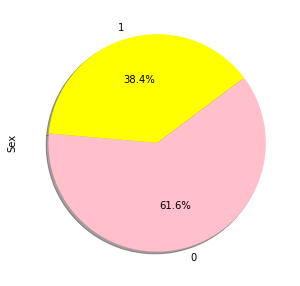

In [6]:
plt.subplots(figsize=(5,5))
a=train_data.groupby(["Survived"])['Sex'].count()
colors = ['pink', 'yellow']

a.plot.pie(colors=colors,autopct='%1.1f%%',shadow=True, startangle=175)

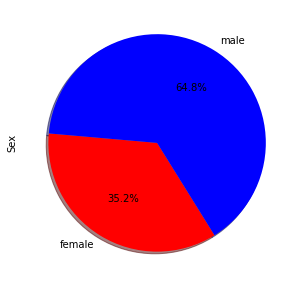

In [7]:
plt.subplots(figsize=(5,5))
a=train_data.groupby(["Sex"]).Sex.count()
colors = ['red', 'blue']

a.plot.pie(colors=colors,autopct='%1.1f%%',shadow=True, startangle=175)

# As we can see from above the Survival rate of Women on the Titanic was higher than that of men.

# The below Cross Tablulation Quantifies my observation pertaining to the Gender bias in the Survival on the train_data .

In [8]:
pd.crosstab(train_data.Sex,train_data.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [9]:
train_data.shape

(891, 12)

    Let us see the number of unique values in Each column and the nature of the columns(categorical or continuous).

In [10]:
columns=train_data.columns
for i in columns:
    print(i,'has :',train_data[i].nunique(),'Unique Values')

PassengerId has : 891 Unique Values
Survived has : 2 Unique Values
Pclass has : 3 Unique Values
Name has : 891 Unique Values
Sex has : 2 Unique Values
Age has : 88 Unique Values
SibSp has : 7 Unique Values
Parch has : 7 Unique Values
Ticket has : 681 Unique Values
Fare has : 248 Unique Values
Cabin has : 147 Unique Values
Embarked has : 3 Unique Values


In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has 177 null values,Cabin-687 and Embarked-2.

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Continuous Features:Sibsp,Parch,Fare,Survived,Age.



Categorical Features:Sex,Embarked,Cabin,Ticket,Name.



Ordinal:Pclass.


According to my Knowledge the Target variable:Survived should be a categorical variable too,but since it is already encoded,they have assumed it to be as a continuous and have given it an int datatype.This makes no effect on our analysis and hence we leave it untouched.



# How many Survived?

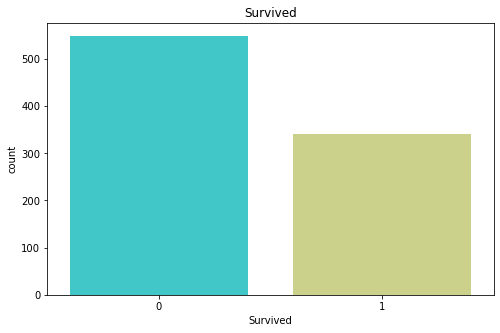

Survived    891
dtype: int64


0    549
1    342
Name: Survived, dtype: int64

In [13]:
plt.figure(figsize=(8,5))
sns.countplot('Survived',data=train_data,palette="rainbow")
plt.title('Survived')
plt.show()
print(train_data[['Survived']].count())
train_data['Survived'].value_counts()

In [14]:
print('The % of people reported dead  on the Titanic:',(train_data['Survived'].value_counts()[0]/np.sum(train_data['Survived'].value_counts()))*100)
print('The % of people who survived on the Titanic:',(train_data['Survived'].value_counts()[1]/np.sum(train_data['Survived'].value_counts()))*100)

The % of people reported dead  on the Titanic: 61.61616161616161
The % of people who survived on the Titanic: 38.38383838383838


From the above visualization,it can easily be said that not a lot of people survived the disaster.


Approximately 38.4% people survived in the training set of the data.



Which is 342 of the total 891 passengers have survived .

# Going by the order, let us now evaluate the relationship of the target with the Passenger Class:

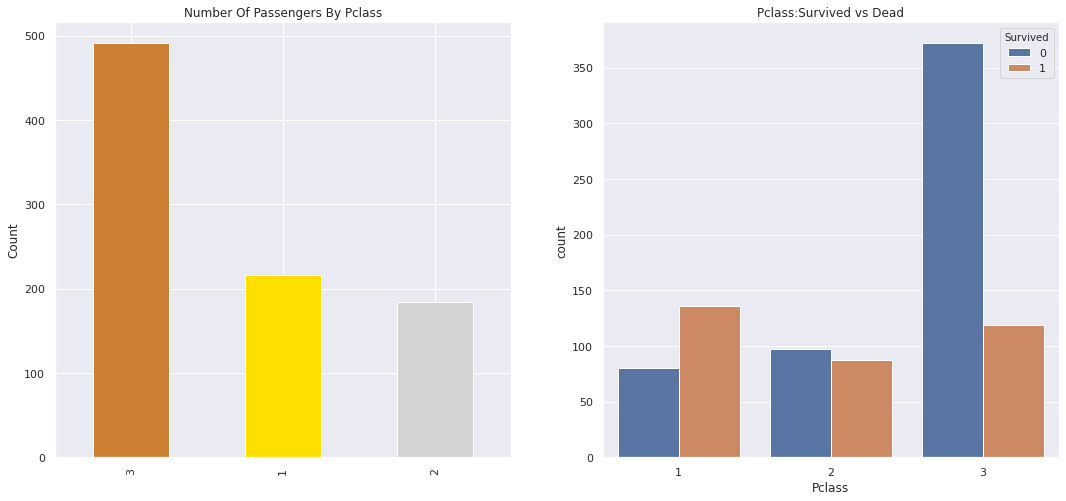

Pclass    891
dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [15]:
sns.set(style='darkgrid')
fig,axes=plt.subplots(1,2,figsize=(18,8))
train_data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=axes[0])
axes[0].set_title('Number Of Passengers By Pclass')
axes[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_data,ax=axes[1])
axes[1].set_title('Pclass:Survived vs Dead')
plt.show()
print(train_data[['Pclass']].count())
print(train_data['Pclass'].value_counts())


* Here,the PClass is divided into 3:
1.First Class
2.Second Class
3.Third Class

From above visualization,we can say that,most passengers opted for Pclass 3 or the lower passenger class.(491)
After the Lower class,most people opted for the 1st Class.(216)
The least number of people opted for the middle class .(184)

* Now about the survival:
1. Most people from the First class or PClass 1 survived.Of 216,136 survived and 80 were reported dead.
2. In the Middle class or PClass 2 the number of people who were reported dead surpassed those who survived.out of 184 people, around 87 survived but 97 were reported Dead.
3. The 3rd or the lower class  has the most number of people's deaths reported, out of 491 who boarded the ship as lower class passengers, only 119 survived and a whopping 372 people were reported dead.




We can clearly say that the Lower Class people are most affected.

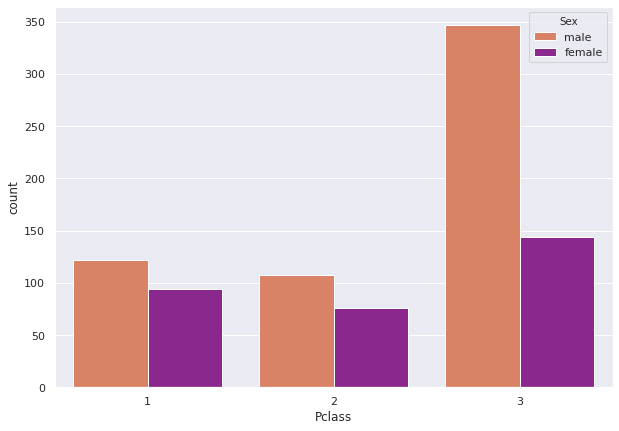

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(train_data.Pclass,hue=train_data.Sex,palette="plasma_r")
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

The number of Males on the ship overall was more compared to the number of women on the ship.The bifurcation is as follows:

PClass1:94 females,122 males.


Pclass2:76 females,108 males.


PClass3:144 females,347 males.


The passenger class 3 had the most number of men and women on the Titanic train data.



From the Survival perspective in terms of Gender:
* Mortality of women in the first class was extremely low.
* Mortality rate of women in the Third class was the highest amongst the Passenger classes,Survived number of females was equal to the number of women who were reported dead in third class.

* Mortality rate of men was much more than that of women overall.
* As  above we can see that the Third Passenger Class had the highest number of male deaths.
* The relative number of male survival was more in Passenger Class 1 and least in Passenger Class 3.



It is evident that money can take you places. Sad but true.




From the above data we can tell that women were Prioritised in terms of rescue,We also know that **Sex** and **Pclass** are two important features for analysis.

# Let us analyse age now:

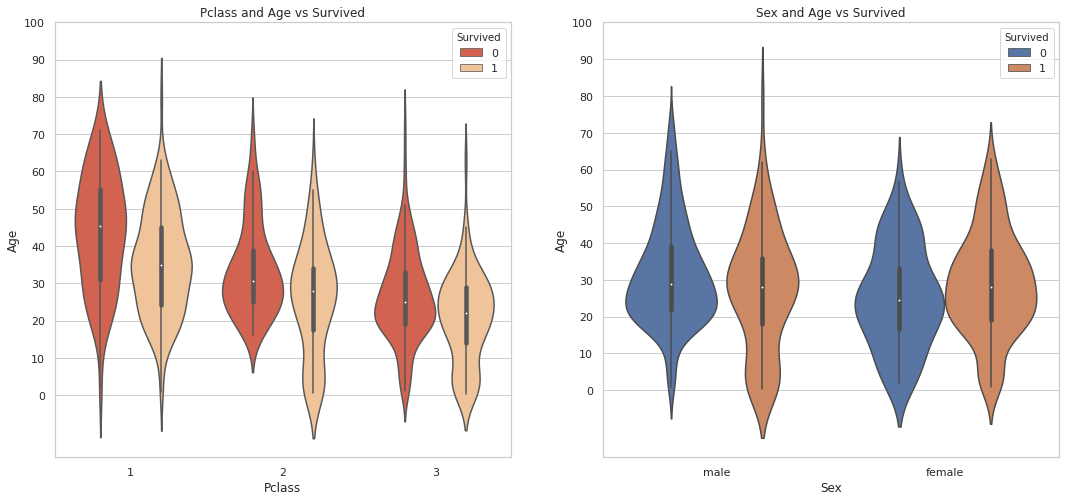

In [17]:
sns.set(style='whitegrid')
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,palette="OrRd_r",ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


* Children less than 10 years of age were saved despite the Passenger Class they belonged to.
* As the age of men increases the Survival Rate decreased.
* More passengers Survived in the Age range 20-50

In [18]:
train_data['Age'].mean()

29.69911764705882

our age data has 177 null values, we could replace them with mean but if we do so,we will encounted a problem of insignificant predictions as mean age of the data is 30 years but the ship comprises of people of all age groups.


We cannot just assign them with 30 years.Hence we shall see different prefixes in name and decide which age group person is having what as prefix and when we decide that we can easily impute the null values.

First we will take all the prefixes and get the mean ages of each prefixes,based on the mean ages of all the prefixes, we impute corresponding null values.

In [19]:
train_data['Prefix']=0
for i in train_data:
    train_data['Prefix']=train_data.Name.str.extract('([A-Za-z]+)\.')

In [20]:
train_data['Prefix'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

there are some prefixes that are misplaced: like Mlle or Mme that stand for Miss. I will replace them with Miss and the relevant for other values

In [21]:
train_data['Prefix'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
train_data.groupby(['Prefix'])['Age'].mean()

Prefix
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Now that we know the mean values of each prefix,lets impute now.

In [23]:
train_data.loc[(train_data.Age.isnull())&(train_data.Prefix=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Prefix=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Prefix=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Prefix=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Prefix=='Other'),'Age']=46

In [24]:
train_data['Age'].isnull().any()

False

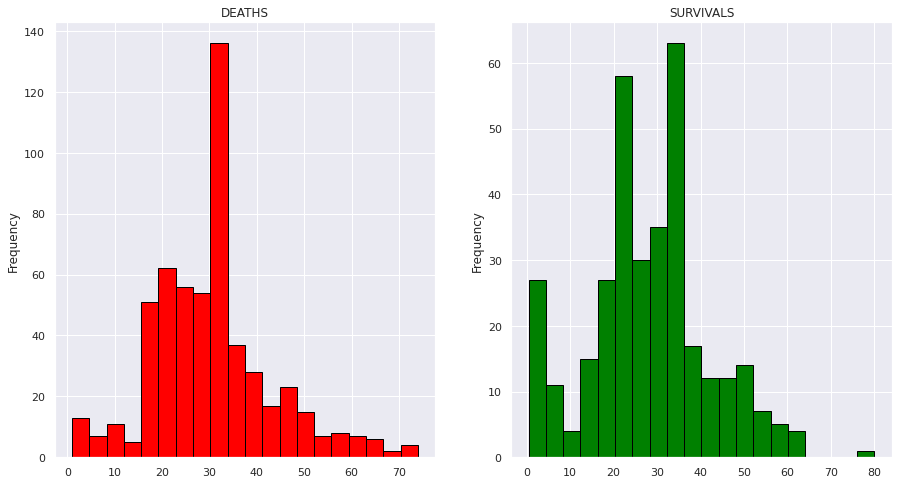

In [25]:
sns.set(style="darkgrid")
fig,ax=plt.subplots(1,2,figsize=(15,8))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('DEATHS')
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('SURVIVALS')
plt.show()

Kids and Elder people and women were saved and Survived more compared to other sexes and age groups.


# Embarked Feature:

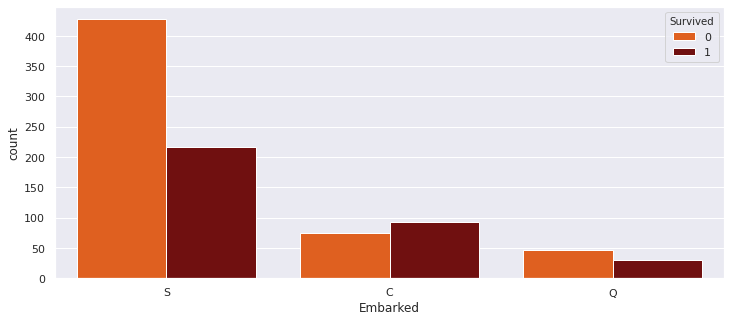

In [26]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.countplot(train_data.Embarked,hue=train_data.Survived,palette='gist_heat_r')


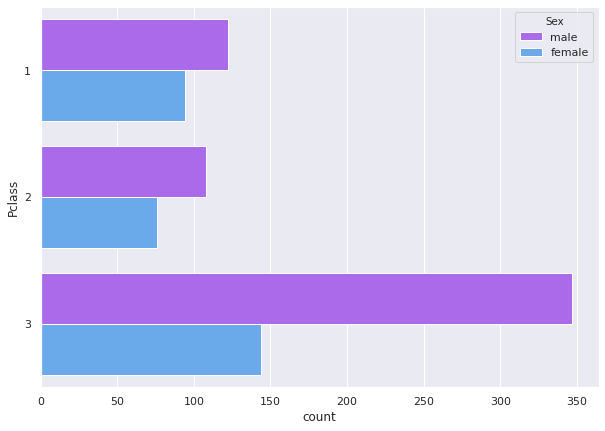

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(y="Pclass", hue="Sex", data=train_data,palette="cool_r")

From the above countplot we can say that the maximum number of people embarked at port 'S'

1.Number of Deaths is least for the embark port Q.


2.Number of Deaths is most for embark port 'S'


3.Embark port 'C' has the most number of survivers.

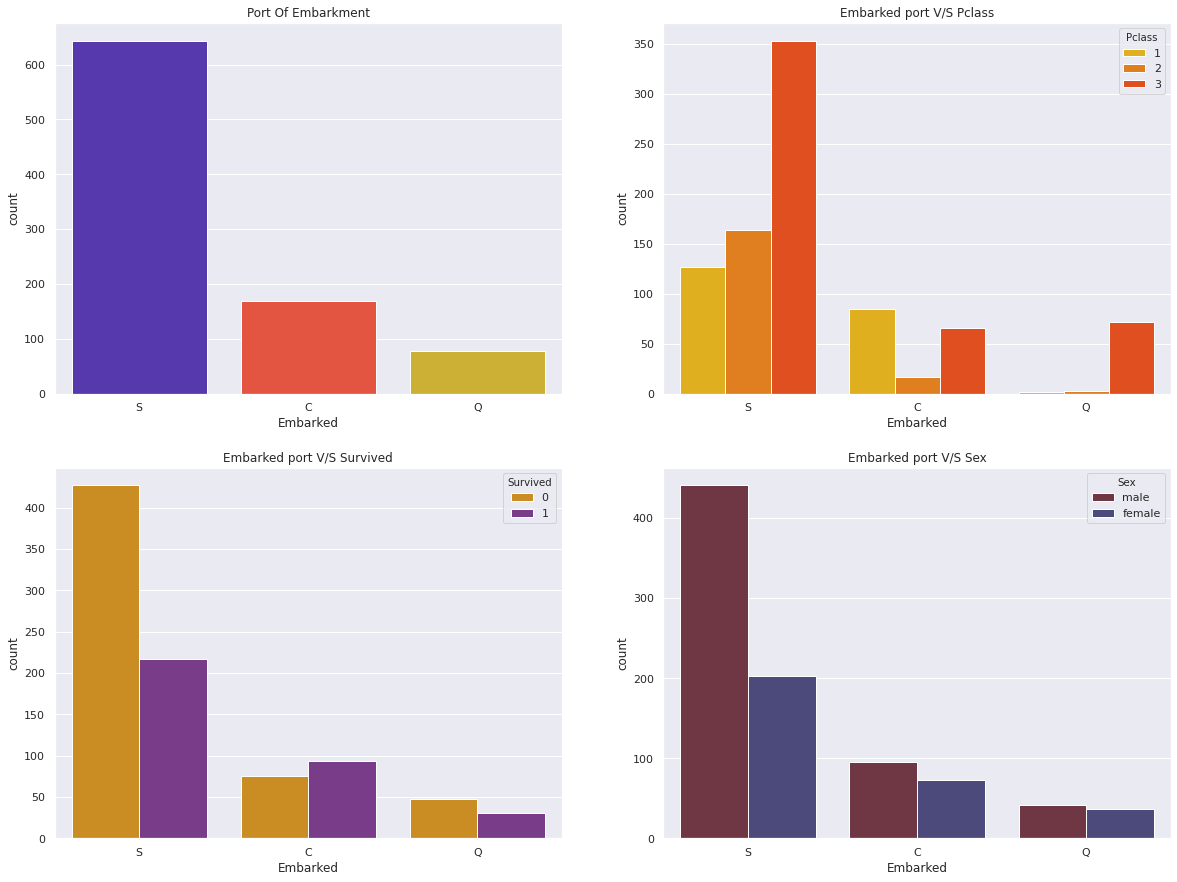

In [28]:
fig,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train_data,ax=ax[0,0],palette="CMRmap")
ax[0,0].set_title('Port Of Embarkment')
sns.countplot('Embarked',hue='Pclass',data=train_data,ax=ax[0,1],palette="autumn_r")
ax[0,1].set_title('Embarked port V/S Pclass')
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[1,0],palette="CMRmap_r")
ax[1,0].set_title('Embarked port V/S Survived')
sns.countplot('Embarked',hue='Sex',data=train_data,ax=ax[1,1],palette="icefire_r")
ax[1,1].set_title('Embarked port V/S Sex')
plt.show()


Port 'S' had most number of people on board, also most Rich folks boarded here, Pclass-1.It also had most number of people from PClass 3 onboard and majority in them were men and hence we have the most number of deaths from Port 'S' and PClass 3.In Port 'S' survival rate of both. men and women seems quiet low.


Port 'C' embarkers had the most survival rate and most of the survivers were from PClass1.



Port 'Q' had majority od Pclass 3 passengers,Males being more than females,Survivalas were less that the ones reported dead.





We will impute null values of Embarked with 'S' as we saw that the majority boarded at port 'S'

In [29]:
train_data['Embarked'].fillna('S',inplace=True)

In [30]:
train_data.Embarked.isnull().any()

False

# Sibsp feature:

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

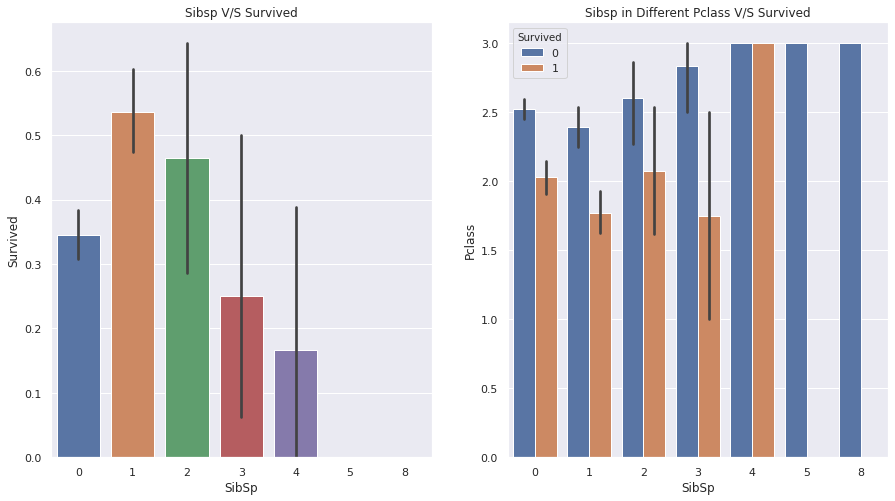

In [31]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot('SibSp','Survived',data=train_data,ax=ax[0])
ax[0].set_title('Sibsp V/S Survived')
sns.barplot('SibSp','Pclass',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Sibsp in Different Pclass V/S Survived')
plt.show()

In [32]:
pd.crosstab([train_data.Pclass,train_data.Survived],train_data.SibSp).style.background_gradient(cmap='summer_r')

## From the above Barplots and Crosstabulation we can come to the following conclusion:
* The Pclass 3 had most number of Casualities.
* The people who travelled with more family memebers were worstly affected by the disaster,mostly because the people with more family members travelled in the 3rd Class.
* People with more than 4 family members barely survived.





In [33]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Prefix           0
dtype: int64

# Cabin:

In [34]:
train_data['Cabin'].values

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

Turns out that the first letter in Cabiun values first letter signifies the deck in which they are located.

Since these features dont seem to have any direct relationship with the target and dont add much value to our data we will drop the below features.

In [35]:
drop_column = ['PassengerId','Cabin', 'Ticket']
train_data.drop(drop_column, axis=1, inplace = True)

In [36]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [37]:
pd.crosstab(train_data.Parch,train_data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


More children who boarded with the nanny survived.

In [38]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
train_data.Parch.count()

891

In [40]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

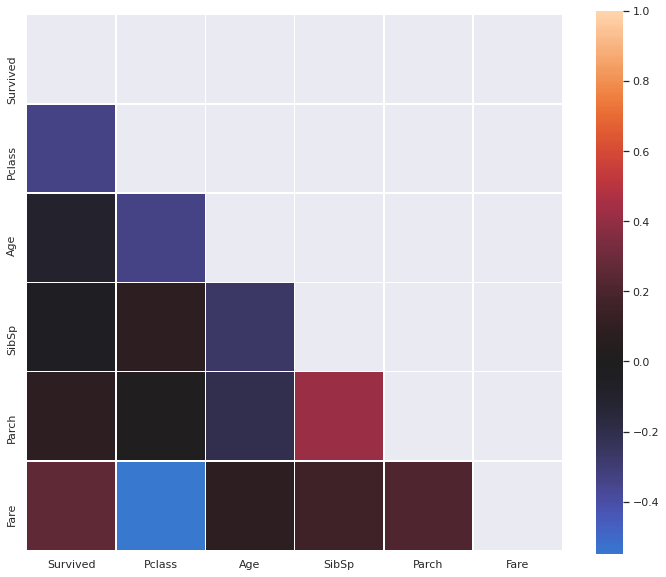

In [41]:
plt.figure(figsize=(12,10))
corr_back = train_data.corr()


mask = np.zeros_like(corr_back, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr_back, mask=mask, center=0, square=True, linewidths=.5)

plt.show()

# Model Building:

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Prefix    891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [43]:
train_data['Sex'] = pd.get_dummies(data=train_data['Sex'],drop_first=True)

In [44]:
train_data['Embarked'] = pd.get_dummies(data=train_data['Embarked'],drop_first=True)

In [45]:
train_data['Name'] = pd.get_dummies(data=train_data['Name'],drop_first=True)

In [46]:
train_data['Prefix'] = pd.get_dummies(data=train_data['Prefix'],drop_first=True)

In [47]:
X = train_data[['Pclass', 'Fare', 'Parch','Sex', 'Embarked']]
y = train_data['Survived']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Logistic Regeression:

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7873134328358209


# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [51]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
d_pred=lr.predict(X_test)
print(accuracy_score(y_test,d_pred))

0.7873134328358209


In [52]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [53]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [54]:
grid_search.best_score_

0.7865290322580647

In [55]:
dt_default1 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=100,min_samples_split=50,criterion='entropy')
dt_default1.fit(X_train, y_train)
dt_pred=dt_default1.predict(X_test)
print(accuracy_score(y_test,dt_pred))

0.7873134328358209


# XGboost:

In [56]:
import xgboost as XG

In [57]:
xg = XG.XGBClassifier(objective='binary:logistic',
n_estimators=10, seed=101)
xg.fit(X_train, y_train)
preds = xg.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.794776


# Test data:

In [58]:
test_data['Sex'] = pd.get_dummies(data=test_data['Sex'],drop_first=True)

In [59]:
test_data['Embarked']=pd.get_dummies(data=test_data['Embarked'],drop_first=True)

In [60]:
test_data.drop(['Name','Ticket','Cabin','Age'],axis=1,inplace=True)


In [61]:
test_data.drop(['SibSp'],axis=1,inplace=True)

In [62]:
test_data['Fare'] = test_data['Fare'].fillna(0)

In [63]:
test_data['Fare'] = test_data['Fare'].astype('int')

In [64]:
X_test_set = test_data[['Pclass', 'Fare','Parch','Sex', 'Embarked']]

In [65]:
predictions = xg.predict(X_test_set)

In [66]:
submission = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':predictions})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)
print("Your submission was successfully saved!")

(418, 2)
Saved file: Titanic Predictions.csv
Your submission was successfully saved!
